# Result visualization

In [93]:
folder_path = "results/GPT-3 Results"
generation_path = f"{folder_path}/generation"

In [94]:
import os
import pandas as pd

# Create a list to store DataFrames for each generation
generation_data = []

# Indices
prompt_indices = {}
system_instruction_indices = {}
thinking_style_indices = {}

# Loop through files in the folder
file_list = sorted([file for file in os.listdir(generation_path) if file.endswith(".csv")], key=lambda x: int(x.split("_")[1].split(".")[0]))

prompt_index = 0
system_instruction_index = 0
thinking_style_index = 0
for file in file_list:
    file_path = os.path.join(generation_path, file)
    df = pd.read_csv(file_path)
    generation_data.append(df)
    
    # Extract and process prompts
    prompts = df['Gene'].apply(lambda x: eval(x)[0]).unique()
    for prompt in prompts:
        if prompt not in prompt_indices:
            prompt_indices[prompt] = prompt_index
            prompt_index += 1
            
    system_instructions = df['Gene'].apply(lambda x: eval(x)[1]).unique()
    for system_instruction in system_instructions:
        if system_instruction not in system_instruction_indices:
            system_instruction_indices[system_instruction] = system_instruction_index
            system_instruction_index += 1
            
    thinking_styles = df['Gene'].apply(lambda x: eval(x)[2]).unique()
    for thinking_style in thinking_styles:
        if thinking_style not in thinking_style_indices:
            thinking_style_indices[thinking_style] = thinking_style_index
            thinking_style_index += 1

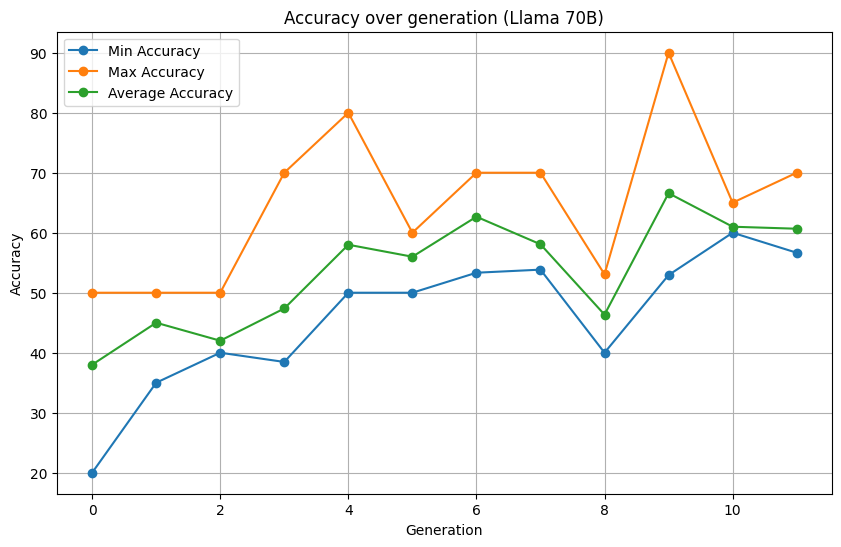

In [95]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists to store min, max, and median accuracy for each generation
min_accuracy = []
max_accuracy = []
avg_accuracy = []

for df in generation_data:
    accuracies = df['Accuracy']
    accuracies = sorted(accuracies, reverse=True)[:5]
    min_accuracy.append(min(accuracies) * 100)
    max_accuracy.append(max(accuracies) * 100)
    avg_accuracy.append(np.mean(accuracies) * 100)

# Create a plot
generations = range(len(generation_data))
plt.figure(figsize=(10,6))
plt.plot(generations, min_accuracy, label='Min Accuracy', marker='o')
plt.plot(generations, max_accuracy, label='Max Accuracy', marker='o')
plt.plot(generations, avg_accuracy, label='Average Accuracy', marker='o')

plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Accuracy over generation (Llama 70B)')
plt.show()

In [96]:
# Create a list to store prompt indices for each row in the combined DataFrame
combined_df = pd.concat(generation_data, ignore_index=True)
combined_df['Prompt Index'] = combined_df['Gene'].apply(lambda x: prompt_indices[eval(x)[0]])
combined_df['System Instruction Index'] = combined_df['Gene'].apply(lambda x: system_instruction_indices[eval(x)[1]])
combined_df['Thinking Style Index'] = combined_df['Gene'].apply(lambda x: thinking_style_indices[eval(x)[2]])
combined_df['Number of examples'] = combined_df['Gene'].apply(lambda x: int(eval(x)[3]))

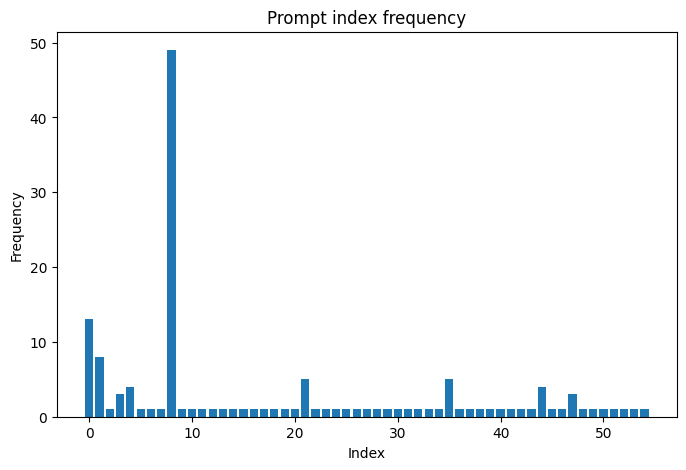

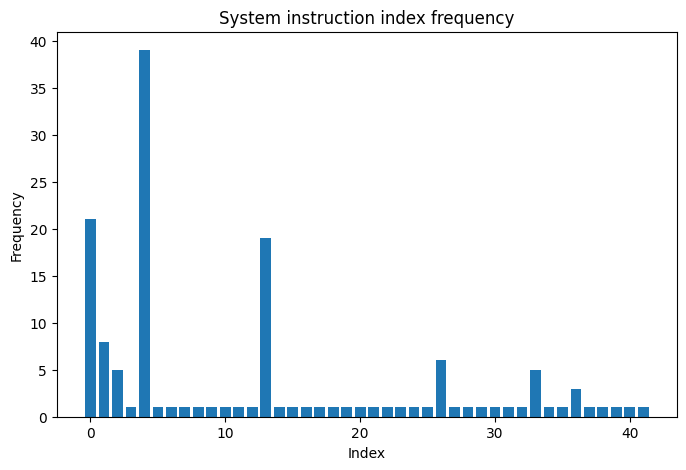

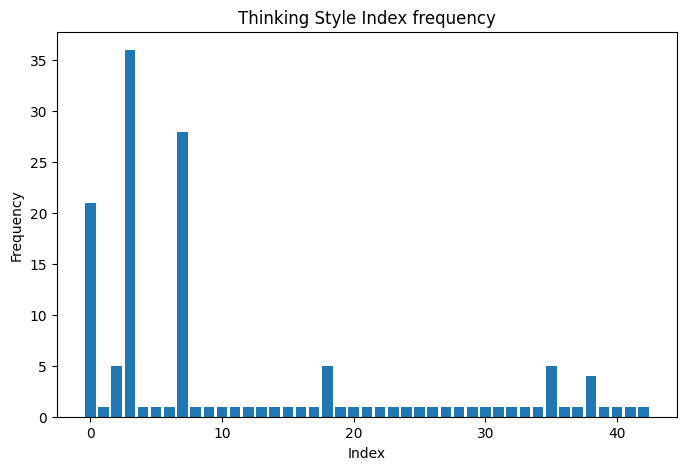

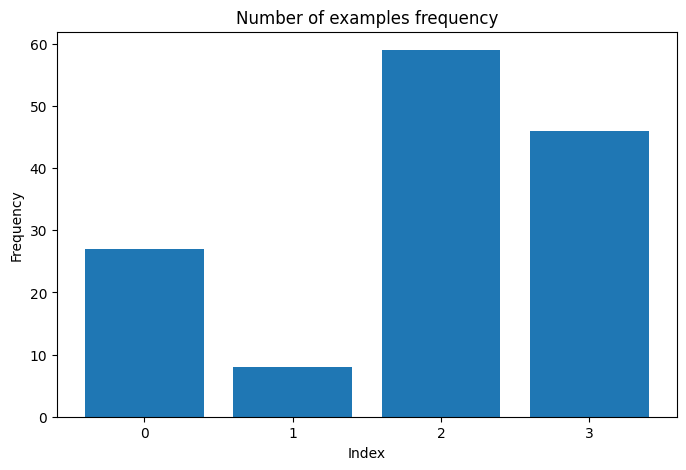

In [78]:
# Plot a histogram of prompt indices
from collections import Counter

# Sample dictionary with indices and their frequencies
data_dict = Counter(combined_df['Prompt Index'])

# Extract keys (indices) and values (frequencies) from the dictionary
indices = list(data_dict.keys())
frequencies = list(data_dict.values())

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(indices, frequencies)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Prompt index frequency')
plt.show()

# Sample dictionary with indices and their frequencies
data_dict = Counter(combined_df['System Instruction Index'])

# Extract keys (indices) and values (frequencies) from the dictionary
indices = list(data_dict.keys())
frequencies = list(data_dict.values())

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(indices, frequencies)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('System instruction index frequency')
plt.show()

# Sample dictionary with indices and their frequencies
data_dict = Counter(combined_df['Thinking Style Index'])

# Extract keys (indices) and values (frequencies) from the dictionary
indices = list(data_dict.keys())
frequencies = list(data_dict.values())

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(indices, frequencies)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Thinking Style Index frequency')
plt.show()

# Sample dictionary with indices and their frequencies
data_dict = Counter(combined_df['Number of examples'])

# Extract keys (indices) and values (frequencies) from the dictionary
indices = list(data_dict.keys())
frequencies = list(data_dict.values())

# Create a bar graph
plt.figure(figsize=(8, 5))
plt.bar(indices, frequencies)
plt.xticks(indices)  # Set the x-axis ticks to be the indices
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Number of examples frequency')
plt.show()